# Quantitative Analysis: Case Study

With the aid of descriptive statistics, the goal is to gain a deeper understanding of stock market dynamics and to inform investment strategies from given dataset. The specific goals include:

1) Trend Analysis: Identifying long-term trends in stock prices and market movements.
2) Volatility Assessment: Evaluating the stability and risk associated with different stocks based on their price fluctuations.
3) Correlation Study: Investigating how different stocks correlate with each other, understanding market segments and diversification opportunities.
4) Risk-Return Trade-off Analysis: Analyzing the balance between the potential risks and rewards of different stocks, aiding in portfolio management.

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 180F-2F4C

 Directory of C:\Users\user\Documents\Data_Science\Project#2

2024-03-18  01:31 PM    <DIR>          .
2024-03-18  01:31 PM    <DIR>          ..
2024-03-18  01:31 PM    <DIR>          .ipynb_checkpoints
2024-03-07  01:29 PM    <DIR>          __MACOSX
2024-03-18  01:31 PM           536,384 Project#3_Quantitative_Analysis.ipynb
2023-05-07  01:34 AM            28,061 Project#3_stocks.csv
2024-03-11  01:25 AM           510,925 Quantitative_Analysis.ipynb
2024-03-11  01:30 AM         1,908,207 Quantitative_Analysis.pdf
2024-03-07  01:29 PM             6,601 stocks.zip
2024-03-15  01:57 PM           972,987 unbiased-look-on-brazil-wildfires.ipynb
2024-03-09  11:25 PM                72 Untitled.ipynb
               7 File(s)      3,963,237 bytes
               4 Dir(s)  28,236,046,336 bytes free


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Project#3_stocks.csv')

In [4]:
df['Ticker'].value_counts()

Ticker
AAPL    62
MSFT    62
NFLX    62
GOOG    62
Name: count, dtype: int64

In [5]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


Text(0.5, 0, 'Stocks')

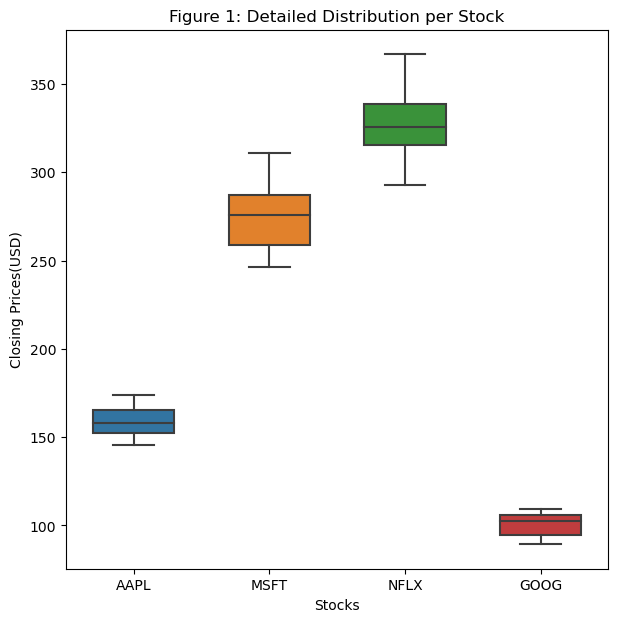

In [6]:
plt.figure(figsize=(7,7), dpi=100)
plt.title('Figure 1: Detailed Distribution per Stock')
sns.boxplot(data=df,x='Ticker',y='Close', width = 0.6, fliersize = 6 )
plt.ylabel('Closing Prices(USD)')
plt.xlabel('Stocks')

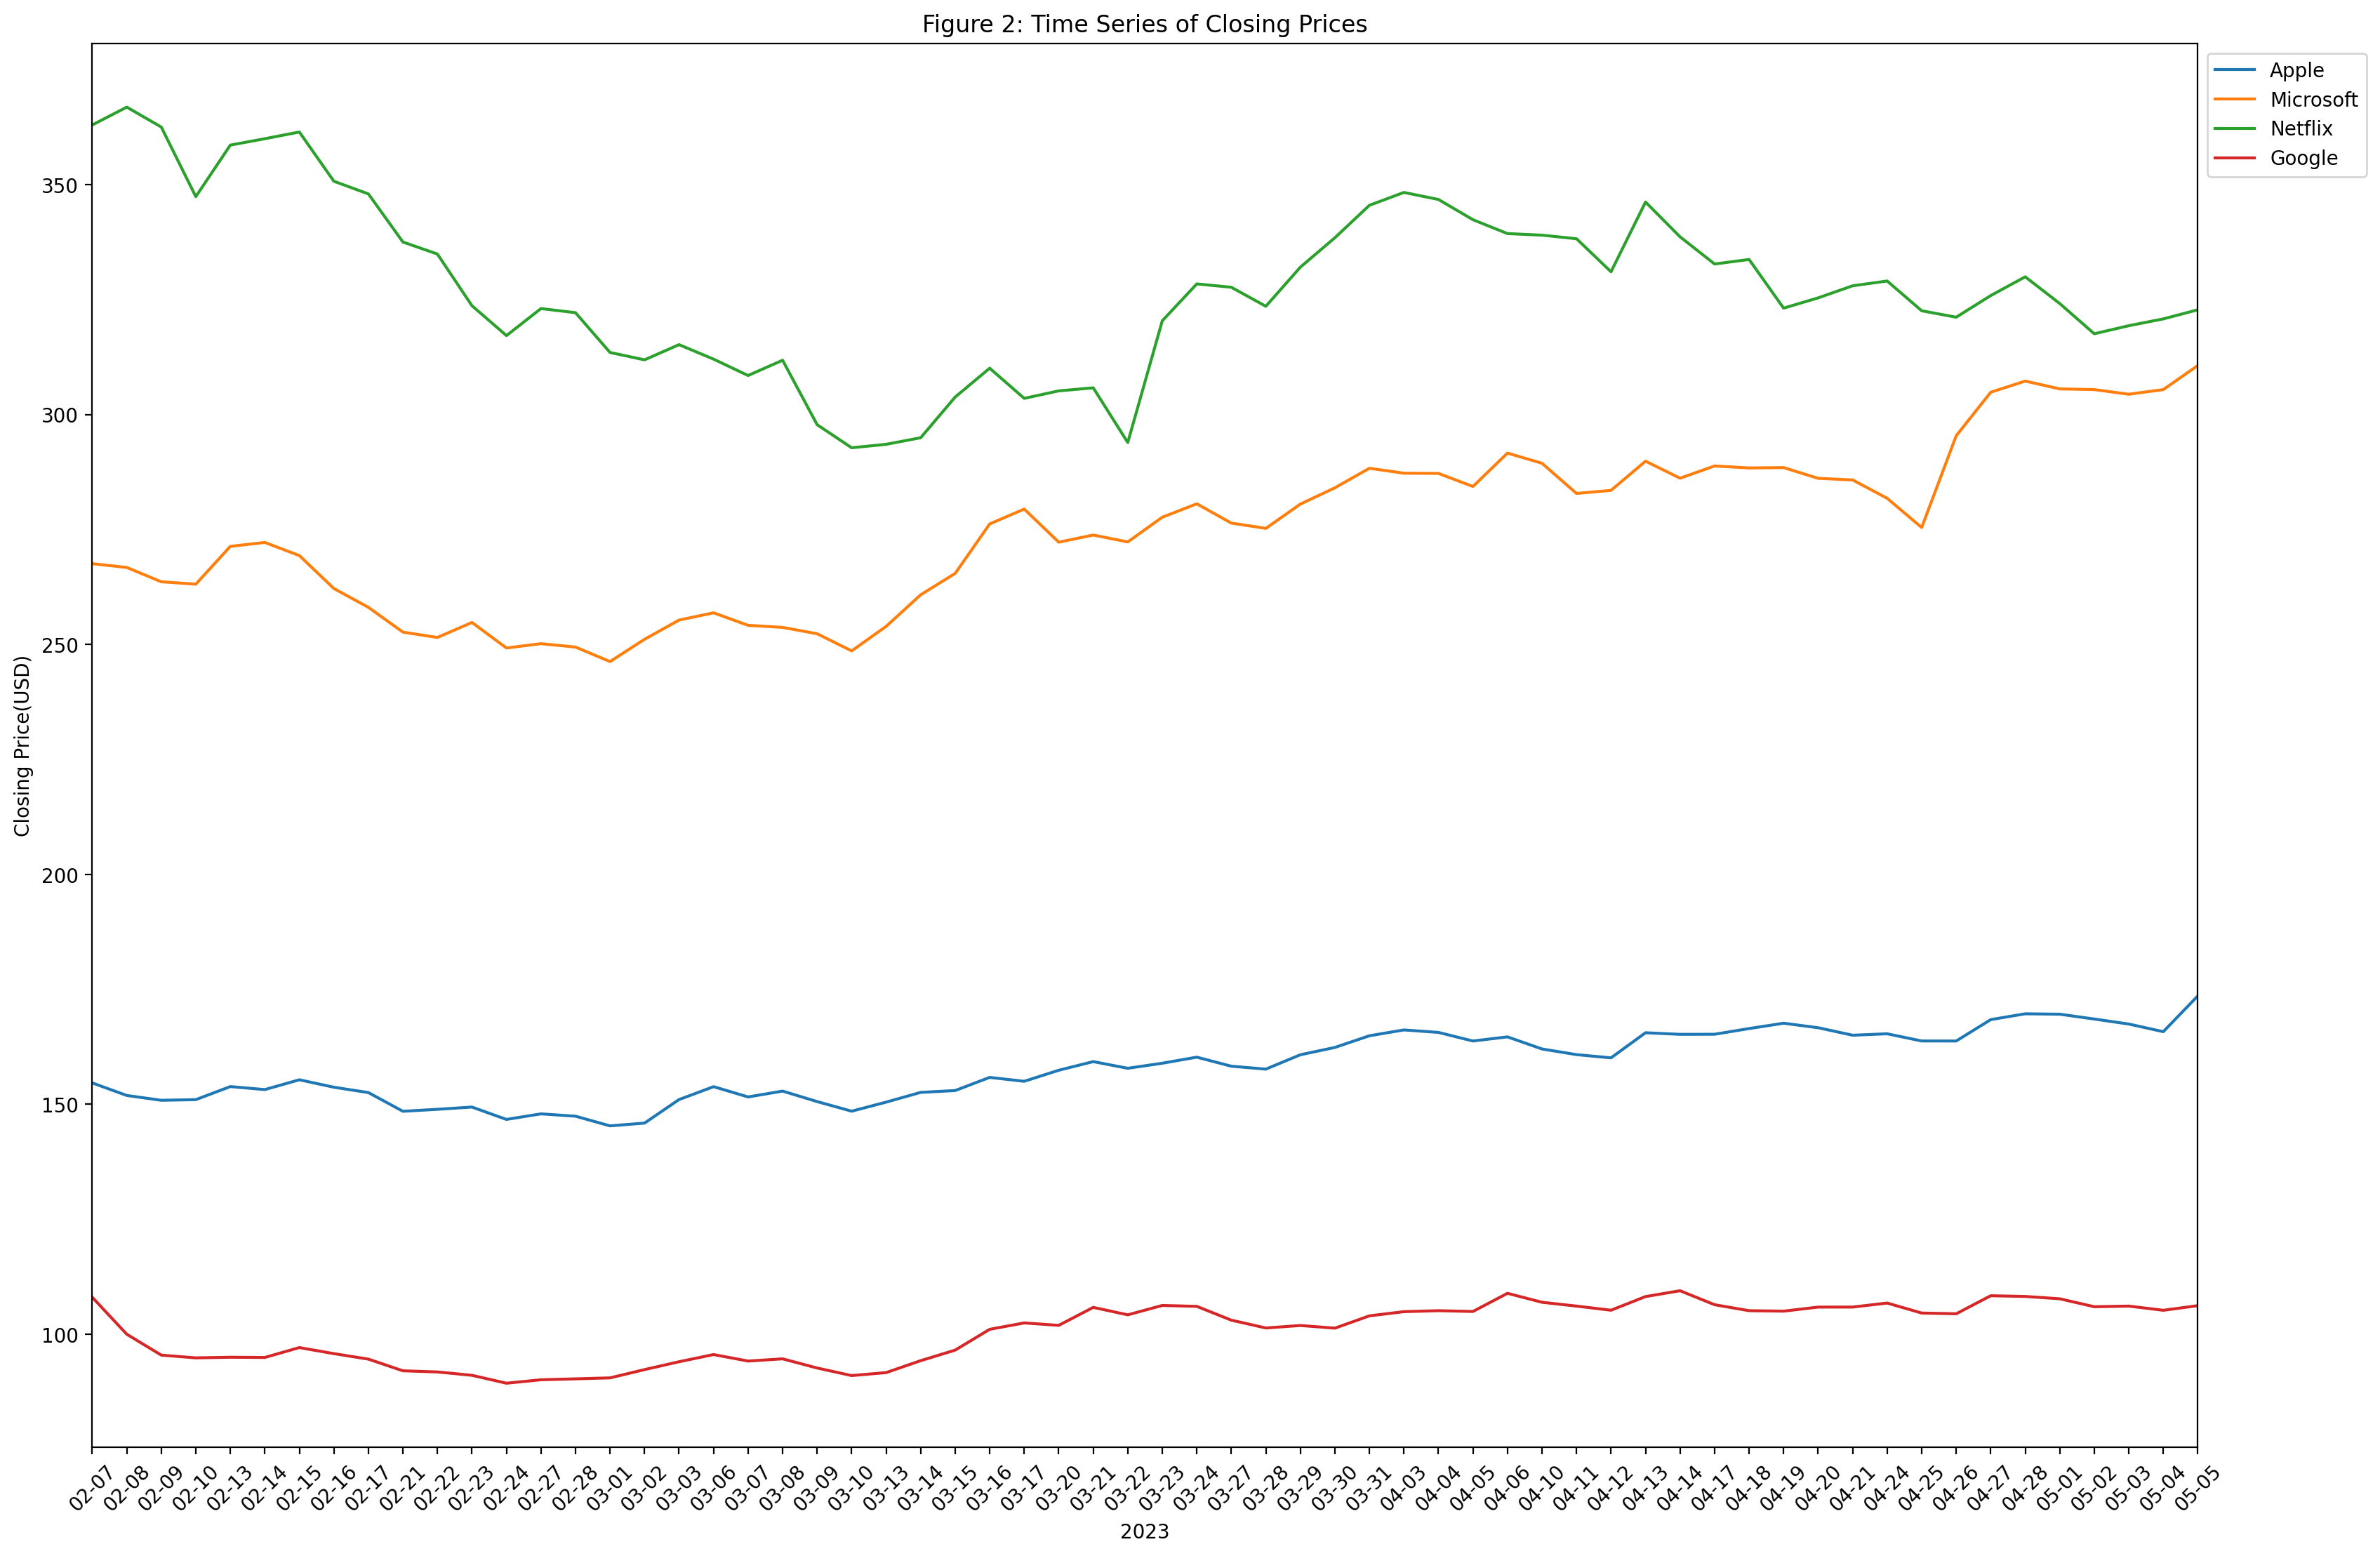

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month_Day'] = df['Date'].dt.strftime('%m-%d')

Apple = df[df['Ticker'] == 'AAPL']
Microsoft = df[df['Ticker'] == 'MSFT']
Netflix = df[df['Ticker'] == 'NFLX']
Google = df[df['Ticker'] == 'GOOG']

comparative = plt.figure(figsize=(15,10), dpi=200)
axes = comparative.add_axes([0,0,1,1])
plt.xticks(rotation=45)
plt.ylabel('Closing Price(USD)')
plt.xlabel('2023')
plt.title('Figure 2: Time Series of Closing Prices')


axes.plot(Apple['Month_Day'], Apple['Close'], label = 'Apple')
axes.plot(Microsoft['Month_Day'], Microsoft['Close'], label = 'Microsoft')
axes.plot(Netflix['Month_Day'], Netflix['Close'], label = 'Netflix')
axes.plot(Google['Month_Day'], Google['Close'], label = 'Google')
axes.set_xlim('02-07', '05-05')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [8]:
grouped = df.groupby('Ticker').describe()['Close']
grouped

,count,mean,min,25%,50%,75%,max,std
Ticker,,,,,,,,
AAPL,62.0,158.240645,145.309998,152.077499,158.055000,165.162506,173.570007,7.360485
GOOG,62.0,100.631532,89.349998,94.702501,102.759998,105.962503,109.459999,6.279464
MSFT,62.0,275.039839,246.270004,258.742500,275.810013,287.217506,310.649994,17.676231
NFLX,62.0,327.614677,292.760010,315.672493,325.600006,338.899994,366.829987,18.554419


# Barplot & Time-Series Charts

    Per Figure 2, both Apple and Microsoft are clearly in a bullish trend. This is observed by the formation of higher lows and a recent break of structure, indicating momentum. Both tickers are forming new highs, suggesting great potential for going long in the near future if a re-test occurs. Choosing between the two would depend on the investment style and risk-taking parameters. Microsoft and Apple would be suitable for short- and long-term returns, respectively. Based on the inter-quartile ranges (Q3-Q1) and ranges (Max - Min), Microsoft shows higher volatility than Apple which makes it ideal for short-term investors, while Apple requires the opposite approach.

    Google shows some great bullish momentum, but for the past two weeks or so, the ticker seems to be stagnating in a range. It is not prudent to take action at this time, especially since the ticker seems to lack volatility at the moment to grasp anyone's attention. It's best to wait for a breakout to confirm the trend direction or to perform additional fundamental analysis on the ticker to gain further insights.

    Netflix's larger range compared to other tickers makes it difficult to predict the current trend. Prices keep fluctuating and revisiting previous highs and lows without bears and bulls taking control. Breakouts have been inconsistent, and my recommendation would be to further perform analysis on a higher timeframe (e.g., Weekly instead of Daily) to have a better picture of what is going on.

    Note: All four tickers trade in different price ranges, with AAPL & GOOG and MSFT & NFLX being the closest to each other. MSFT & NFLX trade at higher price levels.

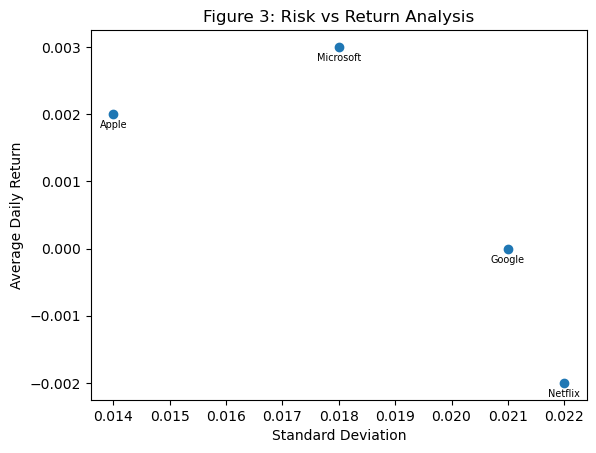

In [9]:
import warnings
warnings.filterwarnings("ignore")

# Average Daily Return vs Standard Deviation 

def calculate_metrics(df):
    df['Daily_Return'] = (df['Close'] / df['Close'].shift(1)) - 1
    avg_dr = np.round(df['Daily_Return'].mean(), 3)
    std = np.round(df['Daily_Return'].std(), 3)
    return avg_dr, std

# Call the function for each stock
apple_avg_dr, apple_std = calculate_metrics(Apple)
microsoft_avg_dr, microsoft_std = calculate_metrics(Microsoft)
netflix_avg_dr, netflix_std = calculate_metrics(Netflix)
google_avg_dr, google_std = calculate_metrics(Google)


plt.title('Figure 3: Risk vs Return Analysis')
plt.ylabel('Average Daily Return')
plt.xlabel('Standard Deviation')



for i in range(4):
    y = [apple_avg_dr, microsoft_avg_dr, netflix_avg_dr, google_avg_dr]
    x = [apple_std,  microsoft_std, netflix_std, google_std]
    label = ['Apple', 'Microsoft', 'Netflix', 'Google']
    plt.annotate(label[i], (x[i], y[i]), textcoords="offset points", xytext=(0,-10), ha='center',fontsize=7)

plt.scatter(x,y)

# Risk vs Return Analysis

    Out of the 4 tickers, Apple shows great daily return with the least risk potential. This confirms my theory that Apple is the most stable long-term investment out of them all. On the other hand, Microsoft is for sure the best option for short-term investing. Regardless the high volatility, it showed the greatest return. It is undoubtedly a great option for experienced traders that have great risk management skills.  
    Google and Netflix do not stand out at all and should not be considered rewarding investments. Both showed negative negative daily returns and the highest volatilities. 

<BarContainer object of 4 artists>

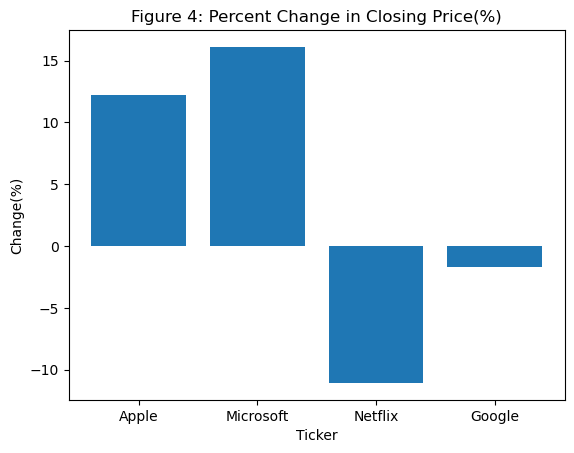

In [10]:
Apple_Change = ((Apple['Close'].iloc[61] - Apple['Close'].iloc[0]) / Apple['Close'].iloc[0]) * 100
Microsoft_Change = ((Microsoft['Close'].iloc[61] - Microsoft['Close'].iloc[0]) / Microsoft['Close'].iloc[0]) * 100
Netflix_Change = ((Netflix['Close'].iloc[61] - Netflix['Close'].iloc[0]) / Netflix['Close'].iloc[0]) * 100
Google_Change = ((Google['Close'].iloc[61] - Google['Close'].iloc[0]) / Google['Close'].iloc[0]) * 100

x = ['Apple', 'Microsoft', 'Netflix', 'Google']
y = [Apple_Change, Microsoft_Change, Netflix_Change, Google_Change]


plt.xlabel('Ticker')
plt.ylabel('Change(%)')
plt.title('Figure 4: Percent Change in Closing Price(%)')
plt.bar(x,y)

In [11]:
y

[12.234086113445672,
 16.104797701851634,
 -11.073150871939196,
 -1.689193411858285]

# Percent Change in Closing Price (%)

    Given that the barplot above measures the total potential profit/loss during the period investigated, Microsoft demonstrated the highest positive change, at approximately 16.10%. Apple displayed a a great positive change of about 12.23%. Google exhibited a slight negative change of approximately -1.69%, suggesting a minor decline in its stock price during the observed period. Lastly, Netflix encountered the most substantial negative change, at approximately -11.07%, indicating a significant decrease in its stock price over the period.

In [12]:
# Volatility of Closing Prices (Standard Deviation vs Ticker) & (Coefficient of Variation vs Ticker)
grouped['std']

Ticker
AAPL     7.360485
GOOG     6.279464
MSFT    17.676231
NFLX    18.554419
Name: std, dtype: float64

Text(0, 0.5, 'Standard Deviation')

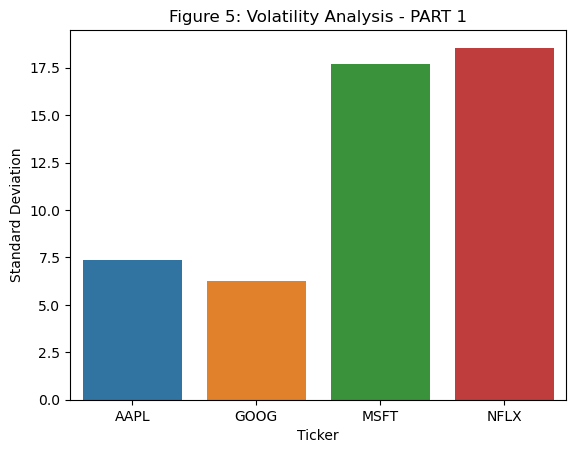

In [13]:
plt.title('Figure 5: Volatility Analysis - PART 1')
sns.barplot(data=grouped, x=grouped.index, y='std')
plt.ylabel('Standard Deviation')

In [14]:
# Coefficient of Variation is = calculated as the ratio deviation to the mean of a dataset
coeff_var = np.round(grouped['std']/grouped['mean'] * 100,2)
coeff_var

Ticker
AAPL    4.65
GOOG    6.24
MSFT    6.43
NFLX    5.66
dtype: float64

Text(0, 0.5, 'Coefficient of Variation')

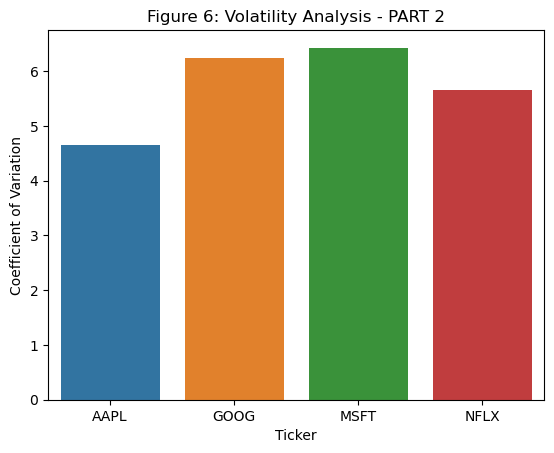

In [15]:
plt.title('Figure 6: Volatility Analysis - PART 2')
sns.barplot(data=grouped, x=grouped.index, y=coeff_var)
plt.ylabel('Coefficient of Variation')

# Volatility Analysis

    Figure 5 shows the volatility (measured as standard deviation) of the closing prices for each stock. If sorted for highest to lowest, the order would be as follows: Netflix, Microsoft, Apple, Google. This aligns with the Figures 1 and 2, boxplot and time-series charts, respectively.
    
    However, using standard deviation to compare volatility is not ideal for tickers that trade in different price levels. In terms of relative variability, GOOG has a higher dispersion from the mean than Netflix and Apple, and is almost the same as Microsoft. 

In [16]:
pivot_df = df.pivot(index='Date', columns='Ticker', values='Close')
results = pivot_df.corr()

<Axes: xlabel='Ticker', ylabel='Ticker'>

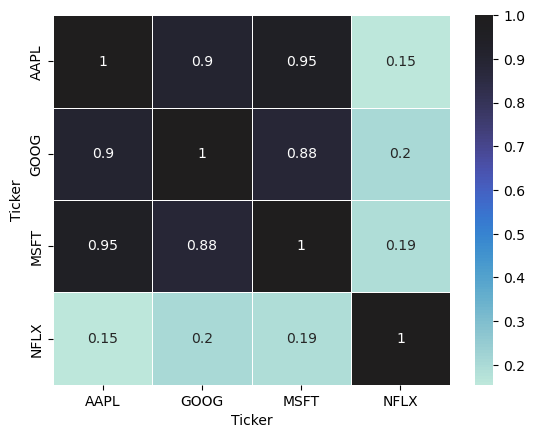

In [17]:
sns.heatmap(results, linewidth=0.5,annot=True, center=1)

# Conclusion

    The heatmap above shows the correlation amongst all tickers. The correlation coefficient measures the strength and direction of the linear relationship between two variables. 1 indicates a perfect linear relationship. On the other hand, -1 indicates a perfect negative linear relationship. Finally, 0 indicates no linear relationship. From the heatmap, there are no negative linear relationships. There are, however, varying degrees of positive correlations between the stock prices. Apple and Microsoft have the highest coefficient (0.95), and Netflix and Microsoft have the lowest (0.19). 
    
    In conclusion, the stock analysis reveals notable trends. Apple and Microsoft showcase bullish patterns, offering stability for long-term investors and potential for short-term gains due to volatility, respectively. Google's recent performance shows stagnation, but the ticker had one of the highest coefficient of variation which indicates high volatility overall. Similarly, Netflix's high volatility requires analysis on a higher timeframe for clarity. Microsoft leads in positive price changes, followed by Apple, Google, and Netflix, aligning with volatility rankings. This underscores the importance of considering volatility and trend patterns in investment decisions.